## Vote Center Wait Times

In [1]:
import json
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
from pandas.io.json import json_normalize
from altair_saver import save
from altair import datum
import altair as alt
import altair_latimes as lat
alt.themes.register("latimes", lat.theme)
alt.themes.enable("latimes")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 34000
pd.set_option('display.max_colwidth', None)

In [2]:
src = pd.read_json('http://locator.lavote.net/getLocations?id=3&electionId=4193')

In [3]:
centers = src.copy()

In [4]:
centers.waitTime.mean()

0.0

In [5]:
now = pd.Timestamp('today')

In [6]:
zips = centers.groupby(['zipCode']).agg({'waitTime': 'mean'}).reset_index()

In [7]:
cities = centers.groupby(['city']).agg({'waitTime': 'mean', 'locationID': 'count'}).reset_index()

In [8]:
zips['time'] = now

In [9]:
cities['time'] = now

In [10]:
zips.sort_values('waitTime', ascending=False).head()

zipCode  waitTime                       time
0     90001         0 2020-11-04 12:19:36.311903
1     90002         0 2020-11-04 12:19:36.311903
162   91202         0 2020-11-04 12:19:36.311903
163   91203         0 2020-11-04 12:19:36.311903
164   91204         0 2020-11-04 12:19:36.311903

In [11]:
cities = cities.rename(columns={'locationID':'centers_count', 'waitTime':'avg_wait_minutes'})

In [12]:
cities.sort_values('avg_wait_minutes', ascending=False).head(15)

city  avg_wait_minutes  centers_count  \
0                    Acton                 0              5   
96               San Dimas                 0              1   
90     Rancho Palos Verdes                 0              3   
91           Redondo Beach                 0              7   
92                  Reseda                 0              1   
93   Rolling Hills Estates                 0              3   
94                Rosemead                 0              5   
95         Rowland Heights                 0              7   
97            San Fernando                 0              5   
88            Porter Ranch                 0              1   
98             San Gabriel                 0              4   
99              San Marino                 0              1   
100              San Pedro                 0             11   
101          Santa Clarita                 0             10   
102       Santa Fe Springs                 0              2   

                          time  
0   2020-11-04 12:19:36.311903  
96  2020-11-04 12:19:36.311903  
90  2020-11-04 12:19:36.311903  
91  2020-11-04 12:19:36.311903  
92  2020-11-04 12:19:36.311903  
93  2020-11-04 12:19:36.311903  
94  2020-11-04 12:19:36.311903  
95  2020-11-04 12:19:36.311903  
97  2020-11-04 12:19:36.311903  
88  2020-11-04 12:19:36.311903  
98  2020-11-04 12:19:36.311903  
99  2020-11-04 12:19:36.311903  
100 2020-11-04 12:19:36.311903  
101 2020-11-04 12:19:36.311903  
102 2020-11-04 12:19:36.311903

In [13]:
cities[cities['city'] == 'Los Angeles']

city  avg_wait_minutes  centers_count                       time
61  Los Angeles                 0            182 2020-11-04 12:19:36.311903

In [14]:
waittime = centers.waitTime.mean()

In [15]:
centers_slim = centers[[ 'locationID', 'name', 'address', 'city', 'waitTime']].sort_values('waitTime', ascending=False)

In [16]:
centers_slim.head(25)

locationID                                 name               address  \
0         14246                          100 Thieves   6050 Jefferson Blvd   
385         118                    Lancaster Library  601 W Lancaster Blvd   
507        1993             Pacific Unitarian Church   5621 Montemalaga Dr   
508       10359          Palisades Recreation Center      851 Alma Real Dr   
509        2539       Palm Park and Community Center        12305 207th St   
510        6017                  Palmdale Elks Lodge    2705 East Avenue Q   
511       14010                 Palmdale High School    2137 East Avenue R   
512        4378                       Palomares Park       499 E Arrow Hwy   
513       10005             Palos Verdes High School        600 Cloyden Rd   
514        9635   Palos Verdes Peninsula High School  27118 Silver Spur Rd   
515        8251                    Pan American Park   5157 E Centralia St   
516       13818         Panorama Presbyterian Church     14201 Roscoe Blvd   
517        4769            Pantera Elementary School        801 Pantera Dr   
518        6826              Paradise Baptist Church       5100 S Broadway   
519       14011  Paramount High School - West Campus  14708 Paramount Blvd   
520       11792        Park View Educational Complex         44327 Fig Ave   
521       13885                Pasadena City College  1570 E Colorado Blvd   
522       14423           Pasadena Convention Center        300 E Green St   
523        2549          Patrick Henry Middle School     17340 San Jose St   
524        9990                           Perry Park        2301 Grant Ave   
525       14424       Philadelphia Elementary School   600 Philadelphia St   
526        4743           Pico Park Community Center     9528 Beverly Blvd   
527       14425               Pio Pico Middle School  1512 S Arlington Ave   
506         500        Pacific Park Community Center     501 S Pacific Ave   
505        6819           Our Savior Lutheran Church       512 W Duarte Rd   

                      city  waitTime  
0              Los Angeles         0  
385              Lancaster         0  
507    Rancho Palos Verdes         0  
508      Pacific Palisades         0  
509               Lakewood         0  
510               Palmdale         0  
511               Palmdale         0  
512                 Pomona         0  
513   Palos Verdes Estates         0  
514  Rolling Hills Estates         0  
515             Long Beach         0  
516          Panorama City         0  
517            Diamond Bar         0  
518            Los Angeles         0  
519              Paramount         0  
520              Lancaster         0  
521               Pasadena         0  
522               Pasadena         0  
523          Granada Hills         0  
524          Redondo Beach         0  
525                 Pomona         0  
526            Pico Rivera         0  
527            Los Angeles         0  
506               Glendale         0  
505                Arcadia         0

In [17]:
centers_slim[centers_slim['name'] == 'Magic Castle']

locationID          name            address         city  waitTime
432       13817  Magic Castle  7001 Franklin Ave  Los Angeles         0

In [18]:
alt.Chart(centers).mark_bar().encode(
    alt.X("waitTime:Q", title='Minutes', bin=alt.Bin(step=5)),
    alt.Y('count()', title=' '),
).properties(width=500, height=500,
     title='Frequency of wait times at LA County voting centers'
)

alt.Chart(...)

In [19]:
geo = gpd.GeoDataFrame(
    src, geometry=gpd.points_from_xy(src.longitude, src.latitude))

<AxesSubplot:>

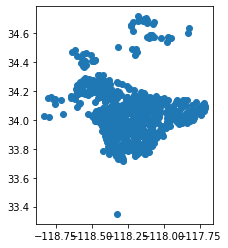

In [20]:
geo.plot()

In [21]:
geo.to_file('output/vote-center-wait.geojson', driver='GeoJSON')

In [22]:
# !tippecanoe --force -z16 -Z5 -o output/drop-box-locations.mbtiles output/drop-box-locations.geojson

In [23]:
centers_slim.to_csv('output/voting-centers/' + f'all_{now:%m%d%Y %H:%M}.csv')

In [24]:
zips.to_csv('output/voting-centers/' + f'zips_{now:%m%d%Y %H:%M}.csv')

In [25]:
cities.to_csv('output/voting-centers/' + f'cities_{now:%m%d%Y %H:%M}.csv')